# Generalisation query example using cats
In this example of generalisation using a conjunctive query, we first query using a picture of a siamese cat. This returns many siamese cats. We then construct a conjunctive query using images of six different types of cats and retrive a set that contains images that fall under the more general category of cat. We use the object-oriented implementation of MSED to achive this.

In [1]:
from pathlib import Path
from sisap2023.utils.mirflickr import load_encodings, set_mf_images_path

data_root = Path("/Volumes/Data")

# set the location of the mirflickr images so they can be displayed
set_mf_images_path(data_root / "mf" / "images")

# load the dino2 image embeddings and the resnet19 softmax activations
data = load_encodings(data_root / "mf_dino2")
sm_data = load_encodings(data_root / "mf_resnet19_softmax")

In [2]:
from sisap2023.utils.count_cats import get_best_cat_index


tabby_cat = 281
tiger_cat = 282
persian_cat = 283
siamese_cat = 284
egyptian_cat = 285
# cougar_cat = 286  # leaving these out as we only want 6 subcategories for the conjunctive query
# lynx_cat = 287
leopard_cat  = 288

best_100_tabby = get_best_cat_index(tabby_cat, sm_data)[0:100]
best_100_tiger = get_best_cat_index(tiger_cat, sm_data)[0:100]
best_100_persian = get_best_cat_index(persian_cat, sm_data)[0:100]
best_100_siamese = get_best_cat_index(siamese_cat, sm_data)[0:100]
best_100_egyptian = get_best_cat_index(egyptian_cat, sm_data)[0:100]
best_100_leopard = get_best_cat_index(leopard_cat, sm_data)[0:100]

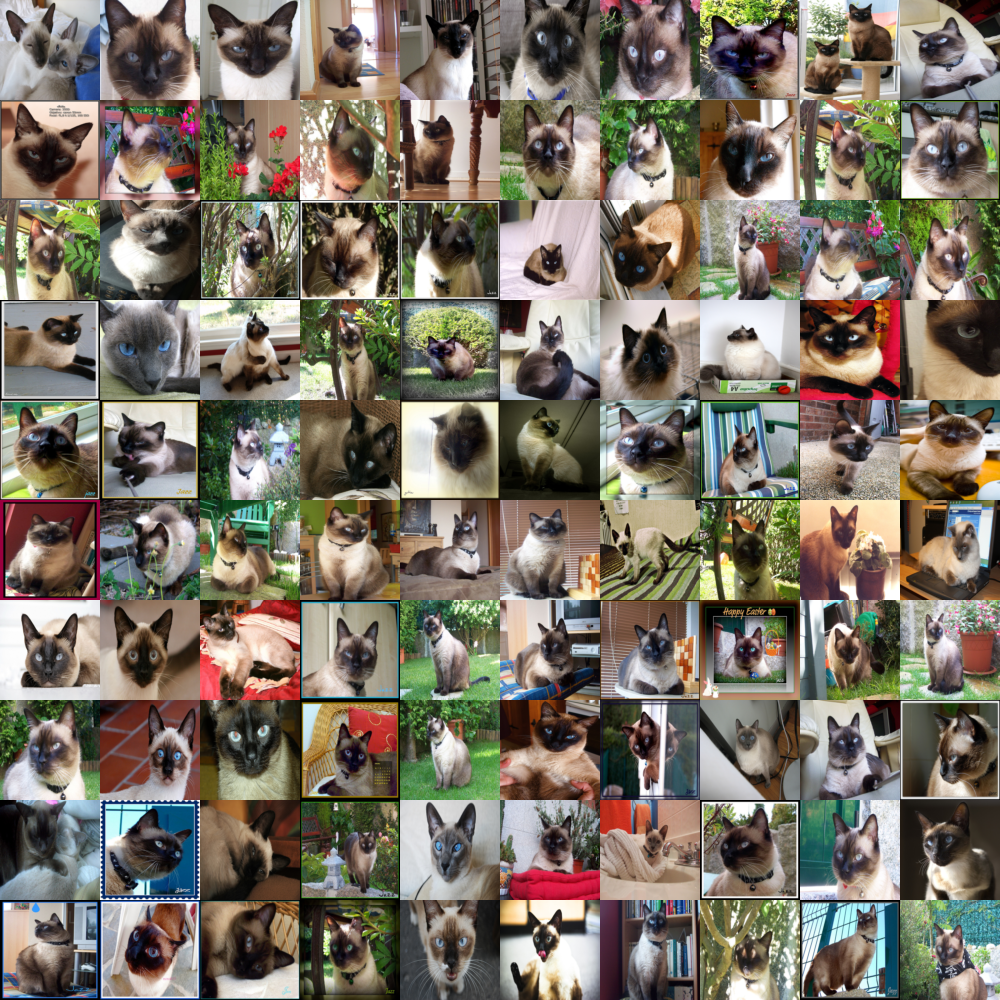

In [3]:
# These are the best images best on lowest average distance from the queries

from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_siamese,10,10,100,100)

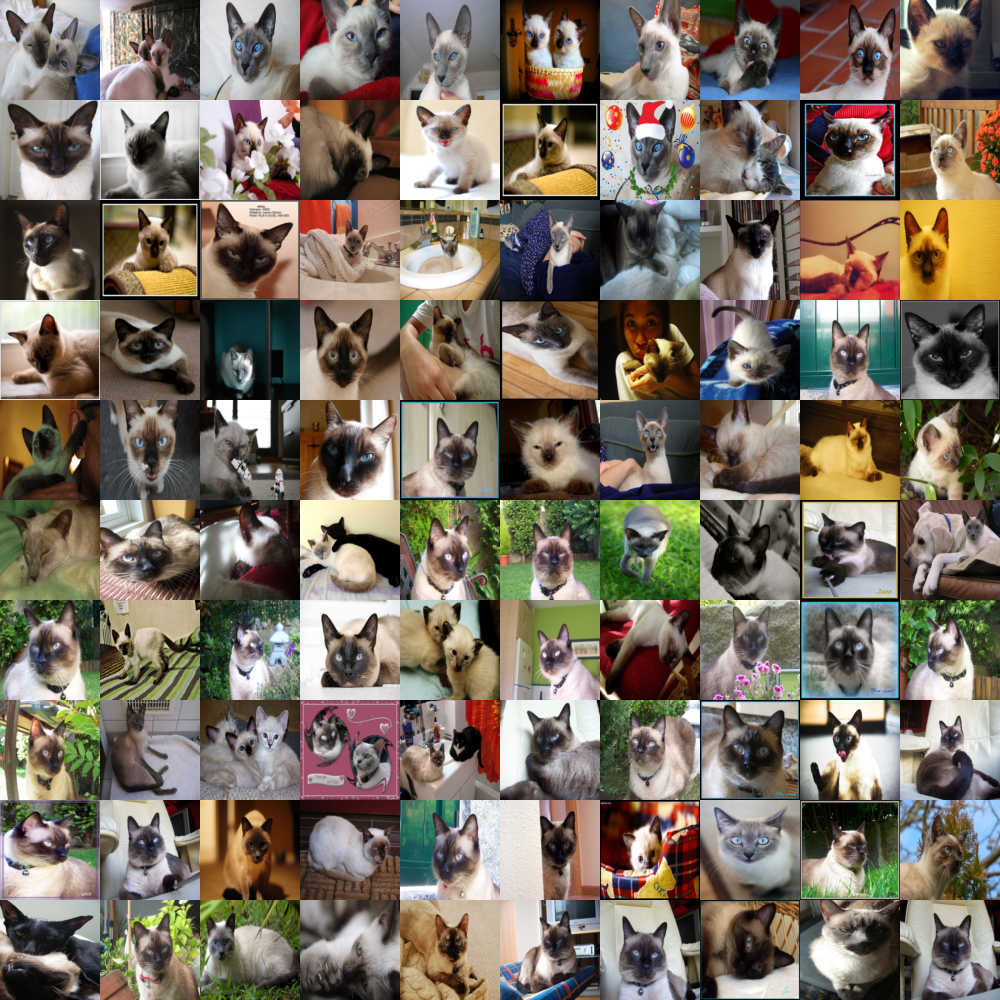

In [4]:
import numpy as np
from sisap2023.metrics.euc import euc
distances = euc(data[best_100_siamese[0]], data)
sorted_indices = np.argsort(distances)
top_100_indices = sorted_indices[:100]
make_mf_image_grid(top_100_indices, 10, 10, 100, 100)

In [7]:
from sisap2023.utils.distances import l1_norm, relu

rn_data = l1_norm(relu(data))

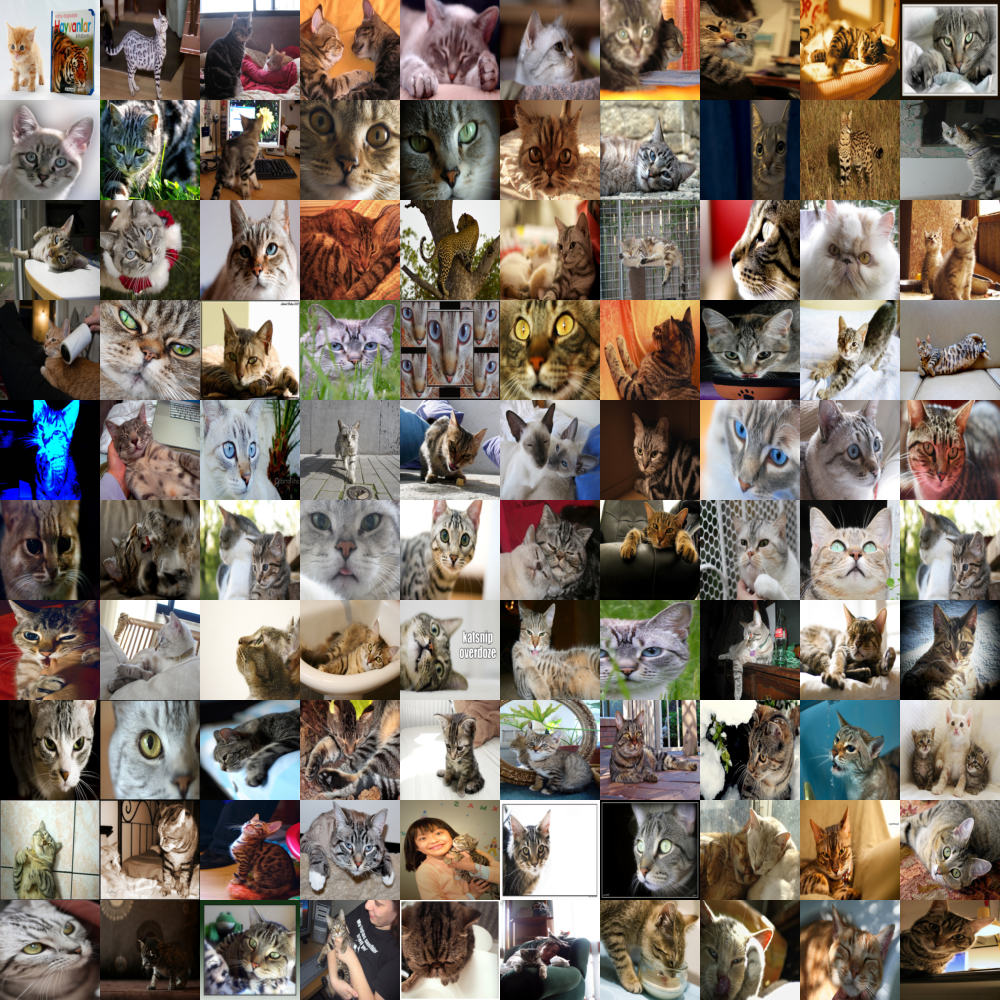

In [8]:
from sisap2023.metrics.msed_class import MSED
import numpy as np

base_data = np.vstack((
    rn_data[best_100_tabby[0]],
    rn_data[best_100_tiger[0]],
    rn_data[best_100_persian[0]],
    rn_data[best_100_siamese[0]],
    rn_data[best_100_egyptian[0]],
    rn_data[best_100_leopard[0]]))   

base = MSED(base_data)  # form the base simplex 

complexities = base.query(rn_data)

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,100,100)
